**AD654 Final Project: Fall 2024**

**Team: Version 5.0**

# **Recommendations for Arundelle Ball using Conjoint Analysis**

**Aim**

*The aim of this analysis is to optimize the selection of event options for Lobster Land’s Arundelle Ball to maximize guest experience while adhering to a strict budget constraint of $50 per attendee, as advised by the finance department. Using ratings-based conjoint analysis on the provided dataset, we will identify the optimal combination of options across various categories. The final deliverable will include a detailed proposal of the recommended set of options, along with justifications for each category, ensuring an unforgettable and cost-effective experience for all attendees.*

**Analysis**

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pulp
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

In [7]:
dance_options = pd.read_csv("/content/dance_options.csv")

In [8]:
dance_options.head()

bundleID   musical_ambience              dress_code  \
0         1  Classical Quartet  Formal Attire Required   
1         2  Classical Quartet  Formal Attire Required   
2         3  Classical Quartet  Formal Attire Required   
3         4  Classical Quartet  Formal Attire Required   
4         5  Classical Quartet  Formal Attire Required   

                           dance_floor_setup  event_duration  \
0  Central Dance Floor with Ambient Lighting               2   
1  Central Dance Floor with Ambient Lighting               2   
2  Central Dance Floor with Ambient Lighting               2   
3  Central Dance Floor with Ambient Lighting               2   
4  Central Dance Floor with Ambient Lighting               2   

           decor_theme                      additional_features  avg_rating  
0  Ice Palace Elegance                  Hot Cocoa and Cider Bar    9.772650  
1  Ice Palace Elegance         Cozy Lounge Area with Fireplaces    9.486008  
2  Ice Palace Elegance  Professional Photographer & Photo Booth    9.648572  
3      Vintage Glamour                  Hot Cocoa and Cider Bar    5.508470  
4      Vintage Glamour         Cozy Lounge Area with Fireplaces    9.391018

In [9]:
# Checking for null values in the datset:
dance_options.isnull().values.any()

False

In [10]:
# Dropping bundleID:
dance_options = dance_options.drop('bundleID', axis=1)

In [11]:
dance_options.head()

musical_ambience              dress_code  \
0  Classical Quartet  Formal Attire Required   
1  Classical Quartet  Formal Attire Required   
2  Classical Quartet  Formal Attire Required   
3  Classical Quartet  Formal Attire Required   
4  Classical Quartet  Formal Attire Required   

                           dance_floor_setup  event_duration  \
0  Central Dance Floor with Ambient Lighting               2   
1  Central Dance Floor with Ambient Lighting               2   
2  Central Dance Floor with Ambient Lighting               2   
3  Central Dance Floor with Ambient Lighting               2   
4  Central Dance Floor with Ambient Lighting               2   

           decor_theme                      additional_features  avg_rating  
0  Ice Palace Elegance                  Hot Cocoa and Cider Bar    9.772650  
1  Ice Palace Elegance         Cozy Lounge Area with Fireplaces    9.486008  
2  Ice Palace Elegance  Professional Photographer & Photo Booth    9.648572  
3      Vintage Glamour                  Hot Cocoa and Cider Bar    5.508470  
4      Vintage Glamour         Cozy Lounge Area with Fireplaces    9.391018

In [12]:
# Sorting the dataset:
dance_options.sort_values(by='avg_rating', ascending=False).head()

musical_ambience                 dress_code  \
972   Contemporary DJ Set     Formal Attire Required   
164     Classical Quartet  Winter Themed Semi-Formal   
1026  Contemporary DJ Set     Formal Attire Required   
79      Classical Quartet     Formal Attire Required   
937            Swing Band        Optional Dress Code   

                                    dance_floor_setup  event_duration  \
972         Central Dance Floor with Ambient Lighting               2   
164       Starlit Ceiling with Glittering Chandeliers               4   
1026      Starlit Ceiling with Glittering Chandeliers               4   
79    Grand Ballroom Setting with Candles and Florals               2   
937   Grand Ballroom Setting with Candles and Florals               2   

              decor_theme                      additional_features  avg_rating  
972   Ice Palace Elegance                  Hot Cocoa and Cider Bar    9.993909  
164   Ice Palace Elegance  Professional Photographer & Photo Booth    9.988016  
1026  Ice Palace Elegance                  Hot Cocoa and Cider Bar    9.984955  
79       Enchanted Forest         Cozy Lounge Area with Fireplaces    9.983904  
937   Ice Palace Elegance         Cozy Lounge Area with Fireplaces    9.982571

In [13]:
dance_options.columns

Index(['musical_ambience', 'dress_code', 'dance_floor_setup', 'event_duration',
       'decor_theme', 'additional_features', 'avg_rating'],
      dtype='object')

In [14]:
# checking the unique values in categorical columns:
print(dance_options['musical_ambience'].unique())
print()
print(dance_options['dress_code'].unique())
print()
print(dance_options['dance_floor_setup'].unique())
print()
print(dance_options['event_duration'].unique())
print()
print(dance_options['decor_theme'].unique())
print()
print(dance_options['additional_features'].unique())

['Classical Quartet' 'Jazz Trio' 'Swing Band' 'Contemporary DJ Set']

['Formal Attire Required' 'Winter Themed Semi-Formal'
 'Optional Dress Code']

['Central Dance Floor with Ambient Lighting'
 'Starlit Ceiling with Glittering Chandeliers'
 'Grand Ballroom Setting with Candles and Florals']

[2 3 4 5]

['Ice Palace Elegance' 'Vintage Glamour' 'Enchanted Forest']

['Hot Cocoa and Cider Bar' 'Cozy Lounge Area with Fireplaces'
 'Professional Photographer & Photo Booth']


In [15]:
# Dummyfing all the categorical variables:
dance_options1 = pd.get_dummies(dance_options, drop_first=True, columns=['musical_ambience', 'dress_code', 'dance_floor_setup','event_duration','decor_theme','additional_features'])

In [16]:
dance_options1.head()

avg_rating  musical_ambience_Contemporary DJ Set  \
0    9.772650                                 False   
1    9.486008                                 False   
2    9.648572                                 False   
3    5.508470                                 False   
4    9.391018                                 False   

   musical_ambience_Jazz Trio  musical_ambience_Swing Band  \
0                       False                        False   
1                       False                        False   
2                       False                        False   
3                       False                        False   
4                       False                        False   

   dress_code_Optional Dress Code  dress_code_Winter Themed Semi-Formal  \
0                           False                                 False   
1                           False                                 False   
2                           False                                 False   
3                           False                                 False   
4                           False                                 False   

   dance_floor_setup_Grand Ballroom Setting with Candles and Florals  \
0                                              False                   
1                                              False                   
2                                              False                   
3                                              False                   
4                                              False                   

   dance_floor_setup_Starlit Ceiling with Glittering Chandeliers  \
0                                              False               
1                                              False               
2                                              False               
3                                              False               
4                                              False               

   event_duration_3  event_duration_4  event_duration_5  \
0             False             False             False   
1             False             False             False   
2             False             False             False   
3             False             False             False   
4             False             False             False   

   decor_theme_Ice Palace Elegance  decor_theme_Vintage Glamour  \
0                             True                        False   
1                             True                        False   
2                             True                        False   
3                            False                         True   
4                            False                         True   

   additional_features_Hot Cocoa and Cider Bar  \
0                                         True   
1                                        False   
2                                        False   
3                                         True   
4                                        False   

   additional_features_Professional Photographer & Photo Booth  
0                                              False            
1                                              False            
2                                               True            
3                                              False            
4                                              False

In [17]:
dance_options1.columns

Index(['avg_rating', 'musical_ambience_Contemporary DJ Set',
       'musical_ambience_Jazz Trio', 'musical_ambience_Swing Band',
       'dress_code_Optional Dress Code',
       'dress_code_Winter Themed Semi-Formal',
       'dance_floor_setup_Grand Ballroom Setting with Candles and Florals',
       'dance_floor_setup_Starlit Ceiling with Glittering Chandeliers',
       'event_duration_3', 'event_duration_4', 'event_duration_5',
       'decor_theme_Ice Palace Elegance', 'decor_theme_Vintage Glamour',
       'additional_features_Hot Cocoa and Cider Bar',
       'additional_features_Professional Photographer & Photo Booth'],
      dtype='object')

In [18]:
X = dance_options1[['musical_ambience_Contemporary DJ Set',
       'musical_ambience_Jazz Trio', 'musical_ambience_Swing Band',
       'dress_code_Optional Dress Code',
       'dress_code_Winter Themed Semi-Formal',
       'dance_floor_setup_Grand Ballroom Setting with Candles and Florals',
       'dance_floor_setup_Starlit Ceiling with Glittering Chandeliers',
       'event_duration_3', 'event_duration_4', 'event_duration_5',
       'decor_theme_Ice Palace Elegance', 'decor_theme_Vintage Glamour',
       'additional_features_Hot Cocoa and Cider Bar',
       'additional_features_Professional Photographer & Photo Booth']]
y = dance_options1['avg_rating']

In [19]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [20]:
Intercept = regressor.intercept_
Intercept

7.480086561029734

In [21]:
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df

Coefficient
musical_ambience_Contemporary DJ Set                  -2.562119
musical_ambience_Jazz Trio                            -1.586839
musical_ambience_Swing Band                           -1.257074
dress_code_Optional Dress Code                        -0.979247
dress_code_Winter Themed Semi-Formal                   0.053121
dance_floor_setup_Grand Ballroom Setting with C...     0.043410
dance_floor_setup_Starlit Ceiling with Glitteri...     1.090418
event_duration_3                                       0.031084
event_duration_4                                       0.519837
event_duration_5                                      -0.137005
decor_theme_Ice Palace Elegance                        2.632346
decor_theme_Vintage Glamour                           -0.024632
additional_features_Hot Cocoa and Cider Bar           -0.310096
additional_features_Professional Photographer &...     0.138671

In [23]:
# Load the vendor costs data
cost_data = pd.read_csv('/content/dance_vendor_costs.csv')

In [ ]:
# Display the loaded data
cost_data

category                                          option   \
0      musical ambience                                Classical Quartet   
1      musical ambience                                        Jazz Trio   
2      musical ambience                                       Swing Band   
3      musical ambience                              Contemporary DJ Set   
4            dress code                           Formal Attire Required   
5            dress code                        Winter Themed Semi-Formal   
6            dress code                              Optional Dress Code   
7     dance floor setup        Central Dance Floor with Ambient Lighting   
8     dance floor setup      Starlit Ceiling with Glittering Chandeliers   
9     dance floor setup  Grand Ballroom Setting with Candles and Florals   
10       event duration                                                2   
11       event duration                                                3   
12       event duration                                                4   
13       event duration                                                5   
14          decor theme                              Ice Palace Elegance   
15          decor theme                                  Vintage Glamour   
16          decor theme                                 Enchanted Forest   
17  additional features                            Hot Cocoa & Cider Bar   
18  additional features                 Cozy Lounge Area with Fireplaces   
19  additional features          Professional Photographer & Photo Booth   

    estimated cost per attendee  
0                            16  
1                            13  
2                            11  
3                             9  
4                             2  
5                             1  
6                             0  
7                             7  
8                            14  
9                             9  
10                            2  
11                            5  
12                            9  
13                           11  
14                            8  
15                            6  
16                            6  
17                            6  
18                            5  
19                            7

**After reviewing the estimated cost per attendee from the dataset, we used a straightforward approach with Excel's Solver to optimize and maximize customer experience while adhering to the ticket price constraint of $50.**

**Approach:**

*The objective function was to maximize customer experience, calculated as the sum product of coefficients and the binary decision variables. The ticket price constraint of 50 usd was achieved by ensuring the sum product of the estimated cost per attendee and the binary decision variables did not exceed 50 usd.*

*The intercept value of $7.48, representing the base cost, was treated as a compulsory selection and included as a constraint. The constraints also ensured that only one option was selected from each category. The decision variables were kept binary to indicate whether an option was selected (1) or not (0). Finally using simplexLP we solved the problem and obtained the optimized output.*

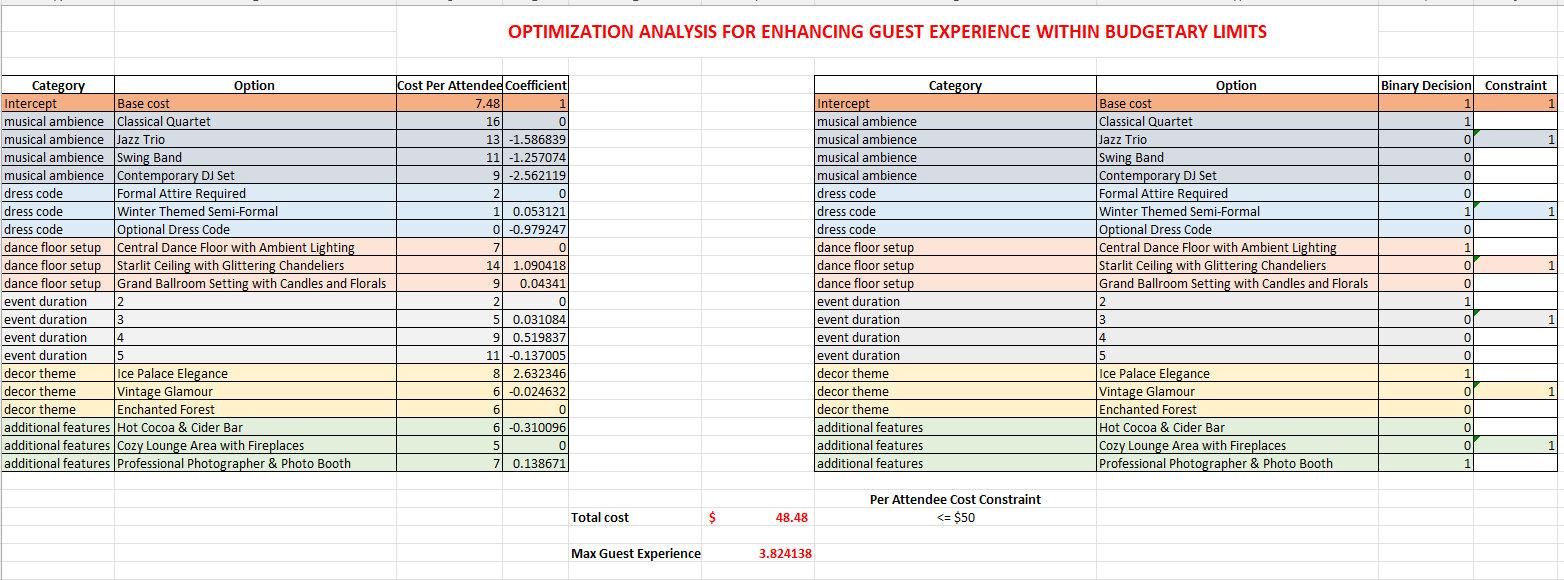

*Please note: Kindly refer to the attached Excel file for the solver analysis included with these files*.

**To validate the results obtained from the Excel Solver model, we implemented the same optimization problem using the Simplex LP method in Python.**

In [30]:
# Data
options = [
    'Base Cost',
    'Classical Quartet', 'Jazz Trio', 'Swing Band', 'Contemporary DJ Set',
    'Formal Attire Required', 'Winter Themed Semi-Formal', 'Optional Dress Code',
    'Central Dance Floor with Ambient Lighting', 'Starlit Ceiling with Glittering Chandeliers','Grand Ballroom Setting with Candles and Florals',
    '2 hours', '3 hours', '4 hours', '5 hours',
    'Ice Palace Elegance', 'Vintage Glamour', 'Enchanted Forest',
    'Hot Cocoa & Cider Bar', 'Cozy Lounge Area with Fireplaces', 'Professional Photographer & Photo Booth'
]

costs = [7.48,
         16, 13, 11, 9,
         2, 1, 0,
         7, 14, 9,
         2, 5, 9, 11,
         8, 6, 6,
         6, 5, 7]

coefficients = [
    1.0,
    0, -1.586839, -1.257074, -2.562119,
    0, 0.053121, -1.979247,
    0, 1.090418, 0.04341,
    0, 0.031084, 0.519837, -0.137005,
    2.632346, -0.024632, 0.0,
    -0.310096, 0.0, 0.138671
]

categories = {
    'musical ambiance': [1, 2, 3, 4],
    'dress code': [5, 6, 7],
    'dance floor setup': [8, 9, 10],
    'event duration': [11, 12, 13, 14],
    'decor theme': [15, 16, 17],
    'additional features': [18, 19, 20]
}

# Creating problem with lp:
problem = pulp.LpProblem("Maximize_Guest_Experience", pulp.LpMaximize)

# Decision Variables
decision_vars = [pulp.LpVariable(f"x_{i}", cat='Binary') for i in range(len(options))]

# Objective Function: Maximize guest experience
problem += pulp.lpSum(coefficients[i] * decision_vars[i] for i in range(len(options)))

# Constraints
problem += pulp.lpSum(costs[i] * decision_vars[i] for i in range(len(options))) <= 50, "Budget Constraint"

# Ensuring exactly one option is chosen per category
for category, indices in categories.items():
    problem += pulp.lpSum(decision_vars[i] for i in indices) == 1, f"{category}_constraint"

# Base cost is always selected
problem += decision_vars[0] == 1, "Base_Cost_Constraint"

# Solving the problem
problem.solve()

# Results
selected_options = [options[i] for i in range(len(options)) if decision_vars[i].value() == 1]
total_cost = sum(costs[i] for i in range(len(options)) if decision_vars[i].value() == 1)
max_experience = sum(coefficients[i] for i in range(len(options)) if decision_vars[i].value() == 1)

# Results
print(f"Type: LpProblem")
print(f"Status: {pulp.LpStatus[problem.status]}")
print(f"Total Cost: ${total_cost:.2f}")
print(f"Max Guest Experience: {max_experience:.6f}")
print()
# Printing selected options with categories
print("\033[1mSelected Options with Details:\033[0m")
for category, indices in categories.items():
    print(f"\n{category.capitalize()}:")
    for index in indices:
        if decision_vars[index].varValue == 1:
            print(f"  - {options[index]} (Cost: ${costs[index]:.2f}, Contribution: {coefficients[index]:.6f})")


Type: LpProblem
Status: Optimal
Total Cost: $48.48
Max Guest Experience: 3.824138

Selected Options with Details:

Musical ambiance:
  - Classical Quartet (Cost: $16.00, Contribution: 0.000000)

Dress code:
  - Winter Themed Semi-Formal (Cost: $1.00, Contribution: 0.053121)

Dance floor setup:
  - Central Dance Floor with Ambient Lighting (Cost: $7.00, Contribution: 0.000000)

Event duration:
  - 2 hours (Cost: $2.00, Contribution: 0.000000)

Decor theme:
  - Ice Palace Elegance (Cost: $8.00, Contribution: 2.632346)

Additional features:
  - Professional Photographer & Photo Booth (Cost: $7.00, Contribution: 0.138671)


**Conclusion**

**Final Recommendations for Arundelle Ball:**

**Based on the solver analysis from Excel and python using simplexLP,  We are recommending the following set of options for Lobster Land's management to create an unforgettable Arundelle Ball experience that optimizes both guest satisfaction and stays within budget constraints.**

*The selected combination has a total cost per attendee of $48.48, ensuring an enjoyable experience while adhering to the budget.*

**Musical Ambiance: Classical Quartet**

*The Classical Quartet was chosen because it has a coefficient value of 0 compared to other musical options, which had negative coefficients. This indicates that while the Classical Quartet does not directly enhance guest experience significantly, it avoids detracting from it. Additionally, it aligns with the sophisticated theme of the Arundelle Ball and fits within the budget constraints.*

**Dress Code: Winter Themed Semi-Formal**

*The Winter Themed Semi-Formal dress code was selected as it provides a small positive contribution (coefficient: 0.053121) to the overall guest experience while being cost-effective. This option supports the elegant and magical atmosphere of the Arundelle Ball without imposing a high cost on attendees.*

**Dance Floor Setup: Central Dance Floor with Ambient Lighting**

*The Central Dance Floor with Ambient Lighting was chosen for its relatively low cost of $7.00 and its ability to create an inviting and warm environment. Although its coefficient indicates no direct contribution to guest experience, this option is essential for ensuring an enjoyable experience without exceeding budget constraints.*

**Event Duration: 2 Hours**

*The 2-hour event duration was selected as it balances costs and logistics while aligning with guest expectations for a compact yet fulfilling experience. While it does not directly contribute to the guest experience (coefficient: 0), this duration ensures optimal time for all planned activities.*

**Decor Theme: Ice Palace Elegance**

*Ice Palace Elegance offers the highest positive contribution to guest experience (coefficient: 2.632346) among decor options. This aligns perfectly with the Arundelle Ball's magical theme, creating a captivating and immersive environment. Despite its $8.00 cost, this option delivers exceptional value in enhancing the overall ambiance.*

**Additional Features: Professional Photographer & Photo Booth**

*The Professional Photographer & Photo Booth was chosen for its contribution to guest experience (coefficient: 0.138671). This option allows guests to capture memorable moments, enhancing their overall satisfaction. At $7.00, it adds significant value without straining the budget.*

These carefully selected options maximize guest satisfaction while adhering to the $50 per ticket budget constraint, ensuring the Arundelle Ball is both unforgettable and financially viable.